In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

In [391]:
import pandas as pd
df = pd.read_excel('data.xlsx')
real_G_ex = np.array(df)
real_G_ex[1]

array([0.0045, 0.0324, 0.0075, 0.0221, 0.012 ])

In [3]:
#Parameters
n = 5 #Number of Genes
#G = 100 #Maximum Number of Generation
T = 16 #Number of time points
t = np.linspace(0,300,16)

In [4]:
best_low = dict()

In [44]:
def rand(l,h,shape):
    return(np.random.uniform(low=l, high=h, size=shape))

In [123]:
def mutation(l,h,i):
    r1 = rand(l,h,i.shape)
    r2 = rand(l,h,i.shape)
    r3 = rand(l,h,i.shape)
    F = 0.02
    return(r1+F*(r2-r3))

In [237]:
np.random.uniform(0,1)

0.4788451321549628

In [317]:
def crossover(g_mutant,g_target):
    
    CR = 0.5
    temp = np.empty(g_target.shape)
    j_rand = np.random.randint(0,len(g_target))
    j = rand(0,1,g_target.shape)
    i = 0
    for x,y,z,t in zip(np.nditer(j),np.nditer(g_mutant),np.nditer(g_target),np.nditer(temp)):
        if(x<=CR or x==j_rand):
            t =y
        elif(x>CR and x!=j_rand):
            t =z
    
    return(temp)       
            
            
            

In [7]:
def define_equation(A,B,g,h,Y):
    
    dydt = A*(np.prod(np.power(Y,g)))-B*(np.prod(np.power(Y,h)))

    return dydt

In [8]:
def random_population():
    learning_parameters = {'A': np.random.uniform(low=0, high=20, size=(n,)), 
                           'B': np.random.uniform(low=0, high=20, size=(n,)), 
                           'g': np.random.uniform(low=-3, high=3, size=(n,n)),
                           'h': np.random.uniform(low=-3, high=3, size=(n,n))}
    return learning_parameters

In [9]:
def get_dydt(ln):
    CalcGenes = []
    for j in range(n):
        temp = []
        for i in range(len(real_G_ex)):
            temp.append(define_equation(ln['A'][j],ln['B'][j],ln['g'][j],ln['h'][j],real_G_ex[i]))
        CalcGenes.append(temp)
    return(CalcGenes)

In [194]:
def selection(fitness_new, fitness_old,g_new,g_old):
    #we assume that old generation is the best
    g_temp = g_old
 
    for i in range(len(fitness_new)):
       
        if(fitness_new[i]<fitness_old[i]):
            g_temp['A'][i]=g_new['A'][i]
            g_temp['B'][i]=g_new['B'][i]
            g_temp['g'][i]=g_new['g'][i]
            g_temp['h'][i]=g_new['h'][i]

    return(g_temp)

In [11]:
def fitness(CalcGenes,real_G_ex):
    fit = ((CalcGenes-real_G_ex)/real_G_ex)**2
    return(np.sum(fit, axis=0))    

In [319]:
def next_generation(g):
    #print('this is the g we got')
    #print(g)
    g_mutant = dict()
    g_mutant['A']=mutation(0,20,g['A'])
    g_mutant['B']=mutation(0,20,g['B'])
    g_mutant['g']=mutation(-3,3,g['g'])
    g_mutant['h']=mutation(-3,3,g['h'])
    #g_temp = {'A': np.random.uniform(low=0, high=20, size=(n,)), 
                  #'B': np.random.uniform(low=0, high=20, size=(n,)), 
                  #'g': np.random.uniform(low=-3, high=3, size=(n,n)),
                  #'h': np.random.uniform(low=-3, high=3, size=(n,n))}
    g_trial = dict()
    g_trial['A'] = crossover(g_mutant['A'],g['A'])
    g_trial['B'] = crossover(g_mutant['B'],g['B'])
    g_trial['g'] = crossover(g_mutant['g'],g['g'])
    g_trial['h'] = crossover(g_mutant['h'],g['h'])
            
    return(g_trial)

In [13]:
def save_values(l):
    curr_len = len(all_values)
    all_values[curr_len]=l

In [ ]:
    
    for i, j in zip([1,2,3], [3,2,1]):
    print (i, j)
    
    
    

In [14]:
def get_full_set(g):
    exp = np.transpose(get_dydt(g))
    fit = fitness(exp,real_G_ex)
    return([g,exp,fit])
    

In [365]:
import time

In [383]:
G=0
g = random_population()
all_values = dict()
start = time.time()
best_low=np.array([16,16,16,16,16])
while(np.sum(best_low[2])>6):
    save_values(get_full_set(g))
    new_g = next_generation(g)
    full_set = get_full_set(new_g)
    best_low = all_values[len(all_values)-1]
    g = selection(full_set[2], best_low[2],full_set[0],best_low[0])    
    
total_time_taken = (time.time()-start)
G += len(all_values)
print('number of Generation:', G)
print('best_fitness:', best_low[2])
print('total time taken:', total_time_taken)

number of Generation: 68029
best_fitness: [1.64201845 0.39379374 1.73001399 1.00717764 1.02401712]
total time taken: 349.83281350135803


In [393]:
best_low[0]

{'A': array([ 5.67278298,  5.85550147, 19.49385855, 19.46817015,  3.59330543]),
 'B': array([0.77500562, 0.98783802, 0.84374217, 0.10607076, 0.86355082]),
 'g': array([[ 1.42604045,  0.5499565 , -0.13706501, -0.02793267, -0.50873362],
        [-0.00611853,  1.77700255,  0.02789871, -0.46636196,  0.13618582],
        [ 0.68474841,  0.80352242,  0.6887919 , -0.62584871,  0.18338567],
        [-0.00782087,  0.27337449, -0.30659262,  1.28207438,  0.46109726],
        [-0.23573516, -0.2562239 ,  0.42282942,  0.16976267,  1.31679413]]),
 'h': array([[0.15302988, 0.69773683, 0.97101784, 0.03680359, 0.55631221],
        [0.4540126 , 0.72032046, 0.15913586, 0.4209267 , 0.58073619],
        [0.1127516 , 0.50273242, 0.1903082 , 0.2817746 , 0.53261431],
        [0.05416421, 0.5523314 , 0.40624115, 0.72731994, 0.71277174],
        [0.53400876, 0.43575864, 0.95365782, 0.66031822, 0.03695606]])}

In [394]:
best_low[1]

array([[0.00387195, 0.01069041, 0.0012294 , 0.00981247, 0.00313055],
       [0.00797355, 0.03853246, 0.00404188, 0.03496552, 0.00603917],
       [0.01202574, 0.02810177, 0.01107751, 0.02479054, 0.00816034],
       [0.00911952, 0.0185661 , 0.02217067, 0.00545246, 0.01376732],
       [0.00443825, 0.01594254, 0.01392624, 0.0045067 , 0.01619969],
       [0.00871432, 0.01257857, 0.02085823, 0.00713241, 0.02465193],
       [0.00659534, 0.00878442, 0.0133523 , 0.00737028, 0.02111587],
       [0.00590035, 0.00868711, 0.01402423, 0.00659816, 0.02824327],
       [0.01358629, 0.00827414, 0.02290201, 0.00650467, 0.02517887],
       [0.01975094, 0.01669526, 0.03986925, 0.00961559, 0.03280813],
       [0.04410714, 0.00883488, 0.04224455, 0.01014994, 0.0234938 ],
       [0.02803722, 0.00933108, 0.03455663, 0.00711326, 0.02368189],
       [0.02177027, 0.00630262, 0.02517421, 0.00509651, 0.02097327],
       [0.02102037, 0.00860253, 0.02714296, 0.00426723, 0.01694771],
       [0.01943601, 0.00583114, 0.

In [221]:
fitness_list = []
for i in range(len(all_values)):
    fitness_list.append(list(all_values[i][2]))
gs = []
for i in range(len(all_values)):
    gs.append(list(all_values[i][1]))
df = pd.DataFrame(fitness_list)
from openpyxl import load_workbook
writer = pd.ExcelWriter("fitness3.xlsx", engine = 'openpyxl')
book = load_workbook("fitness3.xlsx")
writer.book = book
df.to_excel(writer, sheet_name = 'sheet')
writer.save()
writer.close()

In [113]:
best_low[1]

array([[0.00393862, 0.02087563, 0.00389974, 0.00302012, 0.00503979],
       [0.00561345, 0.03733226, 0.01225771, 0.01462978, 0.0105447 ],
       [0.005771  , 0.0228602 , 0.03650416, 0.02943744, 0.01105058],
       [0.00368746, 0.0032754 , 0.01879466, 0.00914191, 0.02462771],
       [0.00193377, 0.00364907, 0.01142823, 0.00690261, 0.02757124],
       [0.00548028, 0.00989007, 0.02591662, 0.00860472, 0.03168433],
       [0.00451701, 0.01587769, 0.02999142, 0.0098604 , 0.0213147 ],
       [0.00465049, 0.01555296, 0.02236847, 0.00693622, 0.03013922],
       [0.01132583, 0.01271493, 0.02806921, 0.0060785 , 0.02893096],
       [0.0146682 , 0.01109112, 0.02815478, 0.00765891, 0.04873193],
       [0.04149864, 0.0184435 , 0.05376894, 0.00765868, 0.02643218],
       [0.02552221, 0.01105813, 0.02323454, 0.0050342 , 0.03146314],
       [0.02165948, 0.01023229, 0.01542433, 0.00360556, 0.02572337],
       [0.01684993, 0.00506578, 0.01265671, 0.00330312, 0.02676742],
       [0.01709707, 0.00461624, 0.

In [88]:
type(best_low)

list

In [96]:
x = {'A': np.array([ 6.93639529,  5.50368389, 16.16332209,  1.81999001,  7.32817006]),
 'B': np.array([ 6.93639529,  5.50368389, 16.16332209,  1.81999001,  7.32817006]),
 'g': np.array([[ 1.63559328e+00,  2.53115790e-02, -6.14115508e-01,
          3.97086868e-01, -7.11997389e-02],
        [-3.40765150e-01, -1.67818232e+00, -6.27535784e-01,	
          2.74172819e+00,  1.17767403e+00],
        [ 3.65249519e-01, -8.42453598e-01,  6.17097893e-01,	
          1.20578300e+00,  1.08643507e-01],
        [-5.33968369e-01, -2.49576510e-02,  7.17774597e-01,	
          1.15205955e+00, -2.47150967e-02],
        [-2.59961704e-04,  7.55696198e-01,  2.97621367e-01,	
         -6.46662672e-01,  1.12201542e+00]]),
 'h': np.array([[ 0.24804633,  2.37364759,  1.98512295, -2.97289103,  1.69875216],
        [ 2.97374128,  1.33372155,  2.86912441,  1.7959432 , -0.37763844],
        [ 1.75546013, -0.87696559,  0.55404792, -0.52809716,  1.28740762],
        [ 1.71765361,  1.80362992,  2.76520519, -0.7694687 , -2.06723462],
        [ 0.62422748,  1.35963485,  2.45659077,  1.67809032, -0.53826891]])}


In [112]:

print(best_low[0]['g'][1][1])

-1.67818232
-1.6781823157080482


In [298]:
df

,0,1,2,3,4
0,4.166269e+25,1.199652e+14,8.216173,1.670526e+10,1.005465e+33
1,1.600354e+01,3.287835e+12,8.216489,1.670526e+10,4.526870e+07
2,1.600354e+01,3.287835e+12,8.216489,1.316148e+01,4.526870e+07
3,1.600354e+01,3.287835e+12,8.216489,1.316148e+01,4.526870e+07
4,1.600354e+01,1.509499e+01,8.216489,1.316148e+01,4.526870e+07
...,...,...,...,...,...
95,1.283193e+01,1.509499e+01,8.216489,1.005003e+01,1.581908e+01
96,1.283193e+01,1.509499e+01,8.216489,1.005003e+01,1.581908e+01
97,1.283193e+01,1.509499e+01,8.216489,1.005003e+01,1.581908e+01
98,1.283193e+01,1.509499e+01,8.216489,1.005003e+01,1.581908e+01


In [275]:
e = np.power([0.0045, 0.0324, 0.0075, 0.0221, 0.012],[0.307, -0.0739, -1.999,  2.182,  0.363])
for i in range(len(e)):
    e[i] = formatfunc(e[i])
    print(e[i])

0.19
1.288
17691.006
0.0
0.201


In [269]:
def formatfunc(a):
    return "{0:0.3f}".format(a)

In [280]:
e

array([1.9000e-01, 1.2880e+00, 1.7691e+04, 0.0000e+00, 2.0100e-01])

In [272]:
np.power([1,2,3,4,5],[2,2,2,2,2])

array([ 1,  4,  9, 16, 25], dtype=int32)

In [395]:
final_gene_expression = best_low[1]

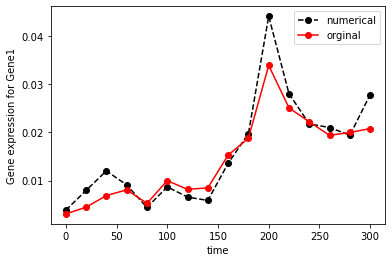

In [386]:
plt.plot(t, final_gene_expression[:,0], marker='o', color='black', linestyle='dashed'  )
plt.plot(t, real_G_ex[:,0], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene1')
plt.legend(('numerical','orginal'))
plt.show()

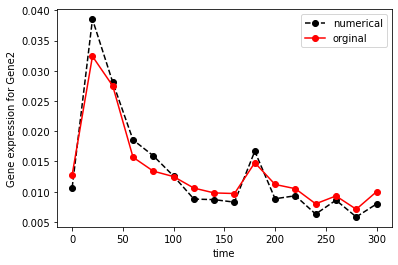

In [387]:
plt.plot(t, final_gene_expression[:,1], marker = 'o', color='black', linestyle='dashed')
plt.plot(t, real_G_ex[:,1], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene2')
plt.legend(('numerical','orginal'))
plt.show()

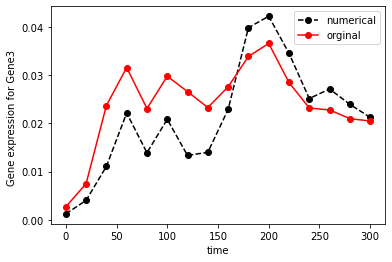

In [388]:
plt.plot(t, final_gene_expression[:,2], marker='o', color='black', linestyle='dashed' )
plt.plot(t, real_G_ex[:,2], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene3 ')
plt.legend(('numerical','orginal'))
plt.show()

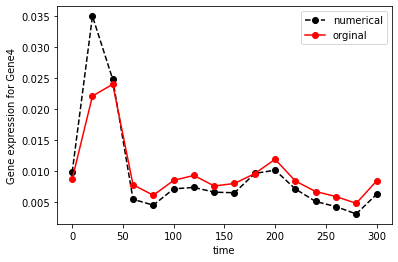

In [389]:
plt.plot(t, final_gene_expression[:,3],marker='o', color='black', linestyle='dashed')
plt.plot(t, real_G_ex[:,3], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene4')
plt.legend(('numerical','orginal'))
plt.show()

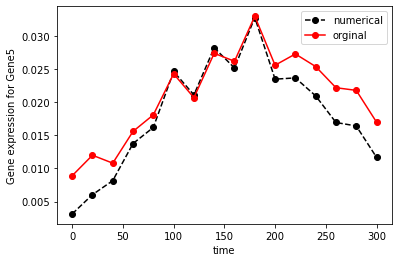

In [390]:
plt.plot(t, final_gene_expression[:,4], marker='o', color='black', linestyle='dashed')
plt.plot(t, real_G_ex[:,4], marker='o', color='red')
plt.xlabel('time')
plt.ylabel('Gene expression for Gene5')
plt.legend(('numerical','orginal'))
plt.show()

In [118]:
a = [1,1,1,1,1]
df3

,0
0,1.699209
1,3.239487
2,2.559580
3,1.907506
4,1.231516


In [509]:
max(a)

1

In [42]:
g = all_values[4999][0]

In [77]:
best_low = all_values[len(all_values)-1]

In [114]:
#df1 = pd.DataFrame(best_low[0])
df2 = pd.DataFrame(best_low[1])
df3 = pd.DataFrame(best_low[2])

In [117]:
from openpyxl import load_workbook
writer = pd.ExcelWriter("BestValues.xlsx", engine = 'openpyxl')
book = load_workbook("BestValues.xlsx")
writer.book = book
#df1.to_excel(writer, sheet_name = 'sheet1')
df2.to_excel(writer, sheet_name = 'sheet2')
df3.to_excel(writer, sheet_name = 'sheet3')

writer.save()
writer.close()

In [95]:
best_low[2].

array([3.6993879 , 2.11181195, 3.78771874, 1.76158111, 1.67580327])

In [2]:
a=10
a

10

In [57]:
x = random_population()
next_generation(x)

[12.691776   12.2027431  15.88465372  0.05503922  4.74752704]
[ 0.92209275  8.84030781 18.13880952 15.22909944  3.13073066]
[[-2.91913562  1.09028011  1.67133454 -1.28321657 -2.56307321]
 [ 0.37924635 -2.9644699   1.16225907 -0.49128568  1.92392787]
 [-1.76308201 -2.33504016  1.81040881 -2.89809324 -0.21571803]
 [-2.37928861 -2.38365152  2.42326338  2.73916875 -0.86692496]
 [-2.85034394  0.63190303  0.87281942  1.13564881 -0.01636046]]
[[-9.31960478e-01 -2.07603003e+00 -2.61430492e+00 -1.92536420e+00
  -1.86679259e+00]
 [ 7.82958147e-01  1.35090898e+00 -2.68438879e+00  1.42461156e+00
   2.95625819e-01]
 [-2.67831218e-01  5.29899188e-04 -4.20594353e-01  1.26647445e+00
  -2.36447459e+00]
 [-4.41590187e-01 -1.80628517e+00 -2.84121238e+00 -2.72576248e+00
  -2.21154640e+00]
 [ 2.48615886e+00 -1.39247460e+00 -2.33018180e+00 -1.29605762e+00
   7.59854744e-01]]


NameError: name 'g_temp' is not defined

In [49]:
result = mutation(-3,3,x)

(5, 5)
[[-0.07626314  0.64736888  0.15043775 -0.72646316 -1.73144369]
 [-0.28693872  1.9787009   0.86167763  2.73268254  2.65776576]
 [-0.66932744 -1.72933992  0.61713187  1.47723728  1.61250119]
 [ 2.41292357 -1.35707794 -2.65274548  2.01805879 -0.22982686]
 [-0.82164159  1.88916805  0.20764746 -0.41599401 -2.51829782]] [[-1.52864044  1.74720186  0.12257632  1.33829322 -1.9227897 ]
 [ 0.04337138 -2.77058959  1.69119378  2.80589276  0.95852251]
 [-0.22150919 -0.57456065 -2.61425598 -2.31579605 -1.46698483]
 [ 0.43063864  0.59610644 -1.00512134  1.49544482 -2.92353504]
 [ 0.1039642  -1.02313364 -1.48993845  0.01424799  0.65207327]] [[-0.42736273  1.32477509 -0.97451717 -2.24229449 -0.93777623]
 [-0.49016819 -0.00432063  1.07730019  1.30304151  2.00701364]
 [-1.74135393 -2.15234663 -2.20932627  0.71409279 -2.43743586]
 [-2.74190777  2.36432933  0.89154409  1.37460658  1.45682197]
 [-0.84186143  0.73090229 -1.66235545  2.91533029  1.33811725]]


In [299]:
a = np.array([[-0.09828869,  0.65581742,  0.17237962, -0.6548514 , -1.75114396],
       [-0.27626793,  1.92337552,  0.8739555 ,  2.76273957,  2.63679594],
       [-0.63893055, -1.6977842 ,  0.60903327,  1.4166395 ,  1.63191021],
       [ 2.4763745 , -1.3924424 , -2.69067878,  2.02047556, -0.317434  ],
       [-0.80272508,  1.85408733,  0.2110958 , -0.47401565, -2.5320187 ]])

In [131]:
a=1
b=2

In [307]:
a

array([[-0.09828869,  0.65581742,  0.17237962, -0.6548514 , -1.75114396],
       [-0.27626793,  1.92337552,  0.8739555 ,  2.76273957,  2.63679594],
       [-0.63893055, -1.6977842 ,  0.60903327,  1.4166395 ,  1.63191021],
       [ 2.4763745 , -1.3924424 , -2.69067878,  2.02047556, -0.317434  ],
       [-0.80272508,  1.85408733,  0.2110958 , -0.47401565, -2.5320187 ]])

In [306]:
i = 0 
it = np.nditer(a, flags=['multi_index'])
for x in np.nditer(a):
    print((x, it.index))
    
    
    
    
    

ValueError: Iterator does not have an index

In [260]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [311]:
for i, j in zip([1,2,3], [3,2,1]):
    print (i, j)

1 3
2 2
3 1
